<a href="https://colab.research.google.com/github/mc-robinson/DeOldify/blob/master/DeOldify_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeOldofy on Colab #

This notebook shows how to get your own version of [DeOldify](https://github.com/jantic/DeOldify) working on Google Colab. A lot of the initial steps are just installs -- but these are also the steps that can make running the model a tedious exercise.

Initially, one must `pip install` a few dependencies, then `wget` is used to download the appropriate picture data.

NECESSARY PRELIMINARY STEP: Please make sure you have gone up to the "Runtime" menu above and "Change Runtime Type" to Python3 and GPU.

I hope you have fun, and thanks to Jason Antic for this awesome tool!

-Matt Robinson, <matthew67robinson@gmail.com>

In [0]:
!git clone https://github.com/jantic/fastai.git

In [0]:
cd fastai/

In [3]:
# get rid of torch requirements
# they cannot be used with pip
%%writefile requirements.txt

bcolz>=1.1.2
bleach>=2.0.0
certifi>=2016.2.28
cycler>=0.10.0
decorator>=4.1.2
entrypoints>=0.2.3
graphviz>=0.8.2
html5lib>=0.999999999
ipykernel>=4.6.1
ipython>=6.2.0
ipython-genutils>=0.2.0
ipywidgets>=7.0.1
isoweek>=1.3.3
jedi>=0.10.2
Jinja2>=2.9.6
jsonschema>=2.6.0
jupyter>=1.0.0
jupyter-client>=5.1.0
jupyter-console>=5.2.0
jupyter-core>=4.3.0
MarkupSafe>=1.0
matplotlib>=2.0.2
mistune>=0.7.4
nbconvert>=5.3.1
nbformat>=4.4.0
notebook>=5.1.0
numpy>=1.13.1
olefile>=0.44
opencv-python>=3.3.0.10
pandas>=0.20.3
pandas_summary>=0.0.41
pandocfilters>=1.4.2
pexpect>=4.2.1
pickleshare>=0.7.4
Pillow>=4.2.1
prompt-toolkit>=1.0.15
Pygments>=2.2.0
pyparsing>=2.2.0
pytest>=3.5.0
python-dateutil>=2.6.1
pytz>=2017.2
PyYAML>=3.12
pyzmq>=16.0.2
qtconsole>=4.3.1
scipy>=0.19.1
seaborn>=0.8.1
simplegeneric>=0.8.1
six>=1.11.0
sklearn_pandas>=1.6.0
terminado>=0.6
testpath>=0.3.1
tornado>=4.5.2,<5
tqdm>=4.15.0
traitlets>=4.3.2
wcwidth>=0.1.7
webencodings>=0.5.1
widgetsnbextension>=3.0.3
spacy>=2.0.11

Overwriting requirements.txt


In [4]:
%%writefile setup.py

# coding: utf-8

""" Setup script for installing fastai """

#from distutils.core import setup
from setuptools import setup

setup(
    name = "fastai",
    packages = ['fastai', 'fastai/models', 'fastai/models/cifar10'],
    version = '0.7.0',
    description = "The fastai deep learning and machine learning library.",
    author = "Jeremy Howard and contributors",
    author_email = "info@fast.ai",
    license = "Apache License 2.0",
    url = "https://github.com/fastai/fastai",
    download_url =  'https://github.com/fastai/fastai/archive/0.7.0.tar.gz',
    install_requires =
     ['bcolz', 'bleach', 'certifi', 'cycler', 'decorator', 'entrypoints', 'feather-format', 'graphviz', 'html5lib',
      'ipykernel', 'ipython', 'ipython-genutils', 'ipywidgets', 'isoweek', 'jedi', 'Jinja2', 'jsonschema', 'jupyter',
      'MarkupSafe', 'matplotlib', 'numpy', 'opencv-python', 'pandas',
      'pandas_summary', 'pickleshare', 'Pillow', 'plotnine', 'Pygments', 'pyparsing', 'python-dateutil', 'pytz', 'PyYAML', 'pyzmq', 'scipy',
      'seaborn', 'simplegeneric', 'sklearn_pandas', 'testpath', 'tornado', 'tqdm',
      'traitlets', 'wcwidth', 'webencodings', 'widgetsnbextension'],
    keywords = ['deeplearning', 'pytorch', 'machinelearning'],
    classifiers = ['Development Status :: 3 - Alpha',
                   'Programming Language :: Python',
                   'Programming Language :: Python :: 3.6',
                   'Topic :: Scientific/Engineering :: Artificial Intelligence']
)

Overwriting setup.py


In [5]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x562b6000 @  0x7f8941df82a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
0.4.1
True


In [0]:
!pip install torchtext==0.2.3

In [0]:
!pip install -e .

In [0]:
import fastai
from fastai import *

In [0]:
!pip install jupyterlab

In [0]:
cd ..

In [0]:
!git clone https://github.com/jantic/DeOldify.git

In [0]:
cd DeOldify/

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
!pip install tensorboardX

In [0]:
# Doing work so I can access data from my google drive
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Note that the above requires a verification step. It isn't too bad.

In [0]:
# Now download the pretrained weights, which I have saved to my google drive
# note that the id is the ending part of the shareable link url (after open?id=)
# The pretrained weights can be downloaded from https://www.dropbox.com/s/7r2wu0af6okv280/colorize_gen_192.h5
download = drive.CreateFile({'id': '1mRRvS3WIHPdp36G0yc1jC0XI6i-Narv6'})
download.GetContentFile('pretrained_weights.h5')

In [0]:
import multiprocessing
import os
from torch import autograd
from fastai.transforms import TfmType
from fasterai.transforms import *
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.callbacks import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.training import *
from fasterai.generators import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
torch.cuda.set_device(0)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True

In [0]:
default_sz=400

netG = Unet34(nf_factor=2).cuda()
load_model(netG, 'pretrained_weights.h5')
netG = netG.eval()

x_tfms = [BlackAndWhiteTransform()]

vis = ModelImageVisualizer(default_sz=default_sz)

In [0]:
# download an example picture to try.
# NOTE: All the jpg files cloned from the git repo are corrupted. Must download yourself.
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/abe.jpg" -O "abe2.jpg"

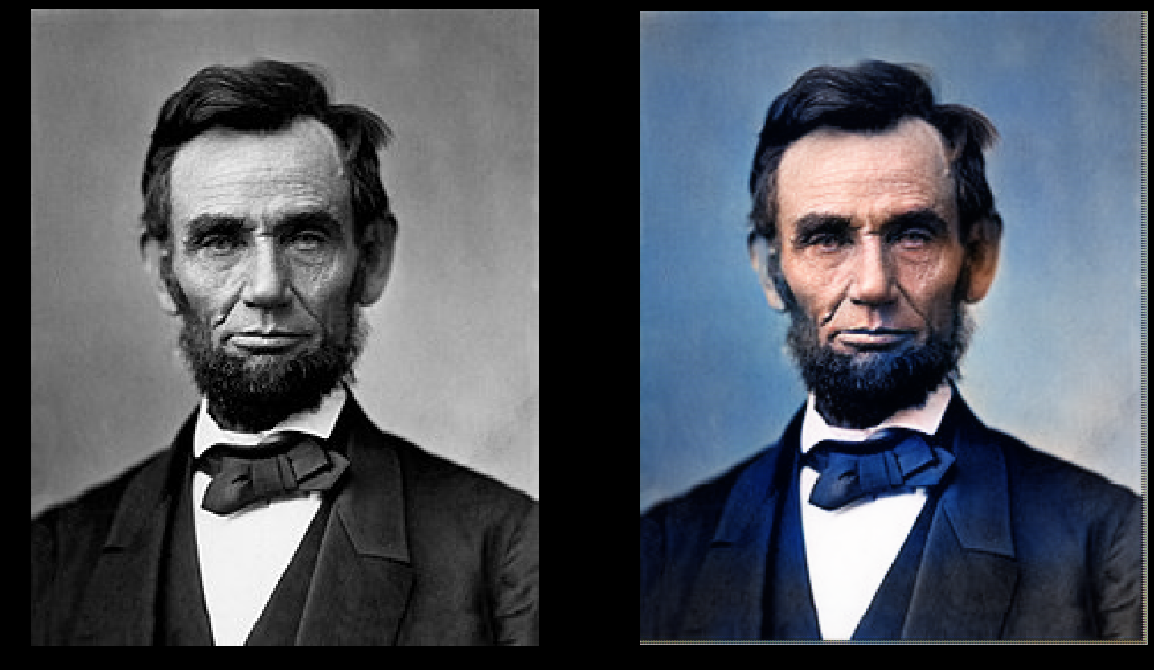

In [32]:
vis.plot_transformed_image('abe2.jpg', netG, tfms=x_tfms, sz=380)

In [0]:
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/TV1930s.jpg" -O "family_TV.jpg"

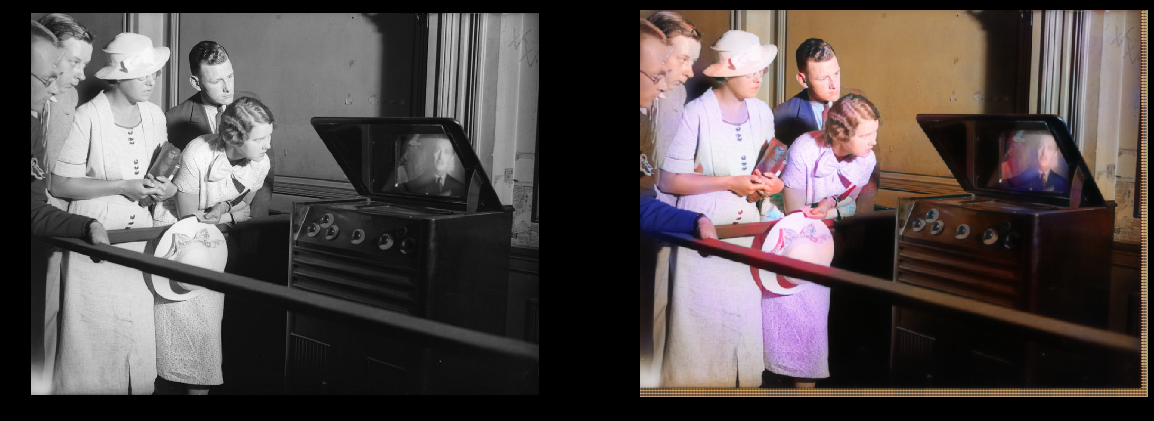

In [27]:
vis.plot_transformed_image('family_TV.jpg', netG, tfms=x_tfms, sz=500)

Let's see how well it does Dorothy before her world turns to color in the Wizard of Oz:

In [0]:
!wget "https://magnoliaforever.files.wordpress.com/2011/09/wizard-of-oz.jpg" -O "Dorothy.jpg"

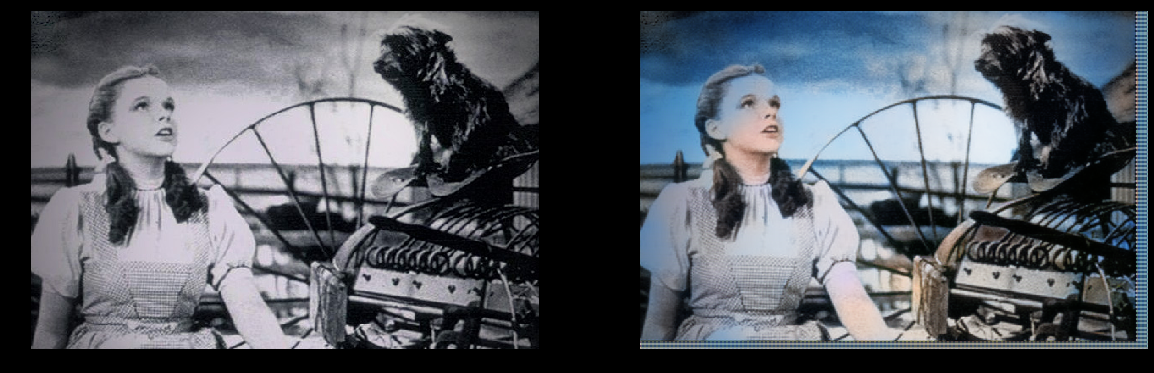

In [29]:
vis.plot_transformed_image('Dorothy.jpg', netG, tfms=x_tfms, sz=500)

Let's now try Butch and Sundance. Famously the last scene ends with a black and white still. So we know what the color was beforehand.

In [0]:
!wget "https://i.ebayimg.com/images/g/HqkAAOSwRLZUAwyS/s-l300.jpg" -O "butch_and_sundance.jpg"

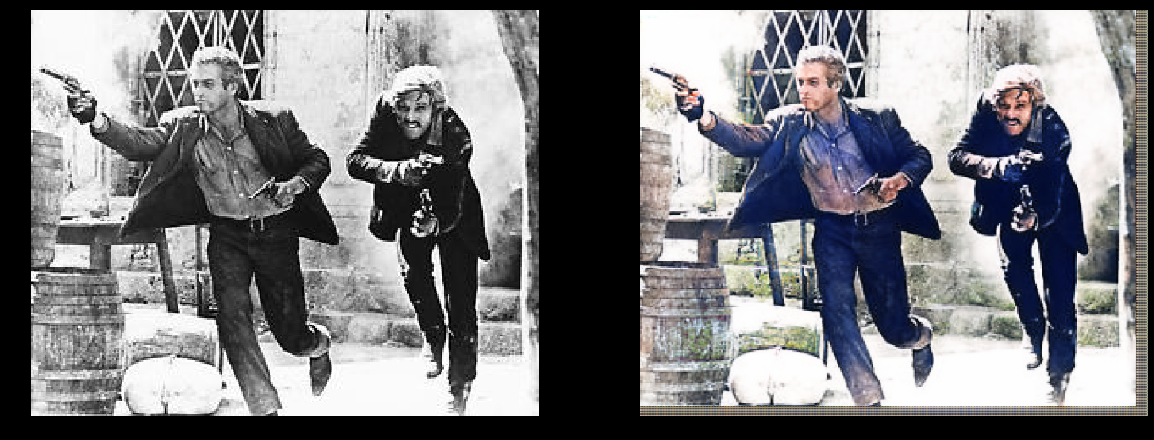

In [34]:
vis.plot_transformed_image('butch_and_sundance.jpg', netG, tfms=x_tfms, sz=500)

Let's get a picture of what they were actually wearing:

In [0]:
!wget "https://bethanytompkins.files.wordpress.com/2015/09/freezeframe.jpg" -O "butch_and_sundance_color.jpg"

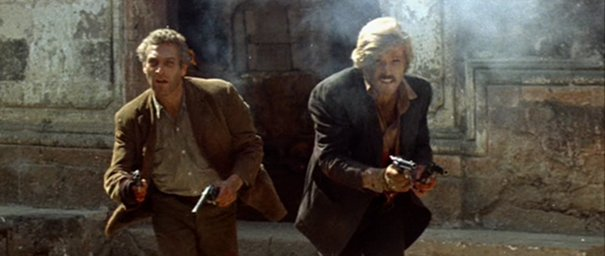

In [36]:
from IPython.display import Image
Image('butch_and_sundance_color.jpg')